In [65]:
import numpy as np

In [66]:
import math

In [67]:
import matplotlib.pyplot as plt

In [68]:
# lagrange

In [69]:
def calc_basis_poly(nodes, k, x):
    res = 1
    for i in range(len(nodes)):
        if(i!=k):
            res*=(x-nodes[i])/(nodes[k]-nodes[i])
    return res

In [70]:
def lagrange_poly(nodes, values, x):
    res = 0
    for i in range(len(nodes)):
        res += values[i] * calc_basis_poly(nodes, i, x)
    return res

In [71]:
nodes_lagrange = np.array([0, np.pi/4, np.pi/2])
values_lagrange = np.array([np.cos(x) for x in nodes_lagrange])

In [82]:
x_axis_lagrange = np.linspace(0, np.pi/2, 1000)
y_axis_lagrange = lagrange_poly(nodes_lagrange, values_lagrange, x_axis)

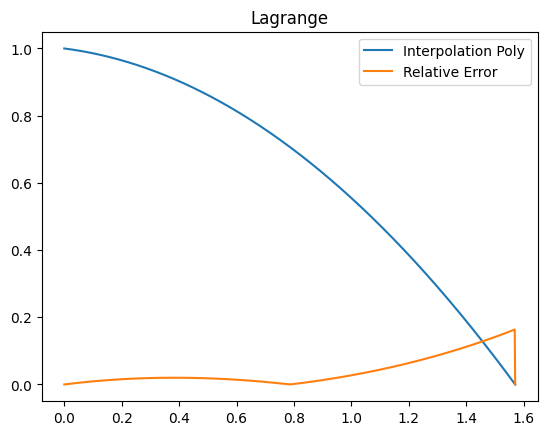

In [83]:
plt.plot(x_axis_lagrange, y_axis_lagrange)
plt.plot(x_axis_lagrange, abs(np.cos(x_axis_lagrange) - lagrange_poly(nodes_lagrange, values_lagrange, x_axis_lagrange))/np.cos(x_axis_lagrange))
plt.title('Lagrange')
plt.legend(['Interpolation Poly', 'Relative Error'])
plt.show()

In [74]:
# Hermite

In [75]:
def divided_diff_extended(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return values[np.argmax(nodes == nodes[l]) + r - l] / math.factorial(r - l)
    return (divided_diff_extended(nodes, values, l + 1, r) - divided_diff_extended(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])

In [84]:
def hermite_poly(nodes, values, x):
    ans = 0
    mult = 1

    for i in range(len(nodes)):
        curr = divided_diff_extended(nodes, values, 0, i) * mult
        ans += curr
        mult *= x-nodes[i]

    return ans

In [85]:
nodes_hermite = np.array([0, 0, np.pi/2])
values_hermite = np.array([1, 0, 0])

In [86]:
x_axis_hermite = np.linspace(0, np.pi/2)
y_axis_hermite = np.array(hermite_poly(nodes_hermite, values_hermite, x_axis_hermite))

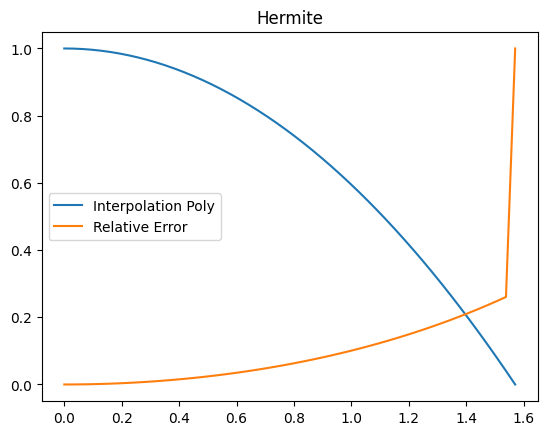

In [88]:
plt.plot(x_axis_hermite, y_axis_hermite)
plt.plot(x_axis_hermite, abs(np.cos(x_axis_hermite) - hermite_poly(nodes_hermite, values_hermite, x_axis_hermite))/np.cos(x_axis_hermite))
plt.title('Hermite')
plt.legend(['Interpolation Poly', 'Relative Error'])
plt.show()

[]

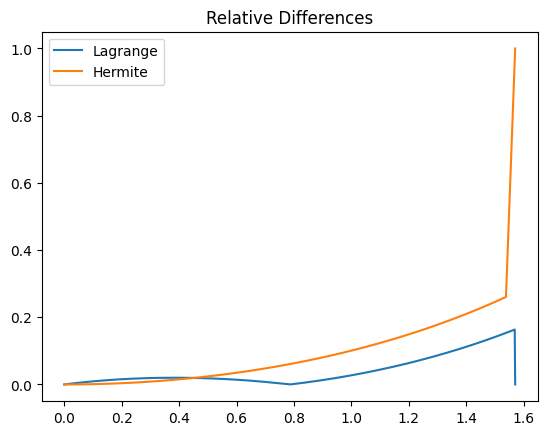

In [92]:
plt.plot(x_axis_lagrange, abs(np.cos(x_axis_lagrange) - lagrange_poly(nodes_lagrange, values_lagrange, x_axis_lagrange))/np.cos(x_axis_lagrange))
plt.plot(x_axis_hermite, abs(np.cos(x_axis_hermite) - hermite_poly(nodes_hermite, values_hermite, x_axis_hermite))/np.cos(x_axis_hermite))
plt.title('Relative Differences')
plt.legend(['Lagrange', 'Hermite'])
plt.plot()